<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/GRAPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
test_F =pd.read_excel('/content/drive/MyDrive/2차 프로젝트 원본 데이터/2기데이터/cm_data_table.xlsx')
test_F.isnull().sum()

성별         0
만나이(세)     0
만나이(개월)    0
L          0
M          0
S          0
1st        0
3rd        0
5th        0
10th       0
15th       0
25th       0
50th       0
75th       0
85th       0
90th       0
95th       0
97th       0
99th       0
-3SD       0
-2SD       0
-1SD       0
0          0
+1SD       0
+2SD       0
+3SD       0
dtype: int64

In [72]:
import pandas as pd
test_S = pd.read_csv('/content/drive/MyDrive/2차 프로젝트 원본 데이터/2기데이터/height_df.csv')
# test_S.iloc[191,2]
# test_S.iloc[191:]
# test_S[test_S['age'] == 82]
test_S

,gender,age,L,M,S
0,1,0,1.0000,49.8842,0.0380
1,1,1,1.0000,54.7244,0.0356
2,1,2,1.0000,58.4249,0.0342
3,1,3,1.0000,61.4292,0.0333
4,1,4,1.0000,63.8860,0.0326
...,...,...,...,...,...
451,0,223,-0.4881,160.8981,0.0308
452,0,224,-0.4959,160.9372,0.0308
453,0,225,-0.5037,160.9762,0.0307
454,0,226,-0.5116,161.0153,0.0307


In [26]:
# 예측 골연령 10살. month age = 120
month_age = round(18 * 12)
month_age


216

In [35]:
def test ( gender, BA, current_H ) :
    lms_df = pd.read_csv('/content/drive/MyDrive/Bone_detection/data/GUI_APR/height_df.csv')

    month_age = round(BA * 12)
    if gender == 1:
        lms_index = month_age - 36                                                             
        L_18, M_18, S_18 = lms_df.iloc[192,2], lms_df.iloc[191,3], lms_df.iloc[191,4]
    elif gender == 0:
        lms_index = month_age - 36
        L_18, M_18, S_18 = lms_df.iloc[383,2], lms_df.iloc[383,3], lms_df.iloc[383,4]

    L,M,S = lms_df.iloc[lms_index,2], lms_df.iloc[lms_index,3],lms_df.iloc[lms_index,4]
    x = current_H
    
    Z = (((x/M)**L)-1)/(L*S)
    Z = round(Z,4)

    pred_height = M_18 * (1 + (L_18 * S_18 * Z)) ** (1 / L_18)
    pred_height = round(pred_height, 1)
    return pred_height, Z

In [55]:
import datetime
today = datetime.date.today()
year = today.year
month = today.month
day = today.day
B_year = 2014
B_month = 10
B_day = 25

In [58]:
T_month = round(( (year - B_year ) * 12) + ( month - B_month ) + ( ( day - B_day ) /30.4 ))

In [59]:
T_month

84

In [61]:
BA = 10.7
month_age = round(BA * 12)
month_age

128

In [62]:
128-36

92

In [66]:
test_F[test_F['만나이(개월)']==92]

,성별,만나이(세),만나이(개월),L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th,-3SD,-2SD,-1SD,0,+1SD,+2SD,+3SD
92,1,NaN,92,0.0628,125.9715,0.0405,114.6,116.7,117.8,119.6,120.8,122.6,126.0,129.5,131.4,132.7,134.6,135.9,138.4,111.5,116.1,121.0,126.0,131.2,136.6,142.2
320,2,NaN,92,-0.4442,124.7224,0.0405,113.7,115.7,116.8,118.5,119.6,121.4,124.7,128.2,130.1,131.4,133.4,134.8,137.3,110.8,115.2,119.8,124.7,129.9,135.4,141.3


In [29]:
test_F[(test_F['성별']==1) & (test_F['만나이(개월)']==120)]

,성별,만나이(세),만나이(개월),L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th,-3SD,-2SD,-1SD,0,+1SD,+2SD,+3SD
120,1,10.0,120,-0.0752,138.8473,0.0417,126.0,128.4,129.7,131.6,133.0,135.0,138.8,142.8,145.0,146.5,148.7,150.2,153.1,122.6,127.8,133.2,138.8,144.8,151.0,157.5


In [32]:
test_F[(test_F['성별']==1) & (test_F['만나이(개월)']==227)]

,성별,만나이(세),만나이(개월),L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th,-3SD,-2SD,-1SD,0,+1SD,+2SD,+3SD
227,1,NaN,227,-0.2615,174.4598,0.0319,162.1,164.4,165.6,167.5,168.8,170.8,174.5,178.3,180.4,181.8,183.9,185.3,188.0,158.7,163.8,169.0,174.5,180.1,186.1,192.2


In [34]:
227 / 12

18.916666666666668

In [74]:
test_F

,성별,만나이(세),만나이(개월),L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th,-3SD,-2SD,-1SD,0,+1SD,+2SD,+3SD
0,1,0,0,1.0000,49.8842,0.0380,45.5,46.3,46.8,47.5,47.9,48.6,49.9,51.2,51.8,52.3,53.0,53.4,54.3,44.2,46.1,48.0,49.9,51.8,53.7,55.6
1,1,0,1,1.0000,54.7244,0.0356,50.2,51.1,51.5,52.2,52.7,53.4,54.7,56.0,56.7,57.2,57.9,58.4,59.3,48.9,50.8,52.8,54.7,56.7,58.6,60.6
2,1,0,2,1.0000,58.4249,0.0342,53.8,54.7,55.1,55.9,56.4,57.1,58.4,59.8,60.5,61.0,61.7,62.2,63.1,52.4,54.4,56.4,58.4,60.4,62.4,64.4
3,1,0,3,1.0000,61.4292,0.0333,56.7,57.6,58.1,58.8,59.3,60.1,61.4,62.8,63.5,64.0,64.8,65.3,66.2,55.3,57.3,59.4,61.4,63.5,65.5,67.6
4,1,0,4,1.0000,63.8860,0.0326,59.0,60.0,60.5,61.2,61.7,62.5,63.9,65.3,66.0,66.6,67.3,67.8,68.7,57.6,59.7,61.8,63.9,66.0,68.0,70.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2,18,223,-0.4881,160.8981,0.0308,149.9,152.0,153.0,154.7,155.9,157.6,160.9,164.3,166.2,167.4,169.4,170.6,173.1,147.0,151.4,156.1,160.9,166.0,171.3,176.9
452,2,18,224,-0.4959,160.9372,0.0308,150.0,152.0,153.1,154.8,155.9,157.6,160.9,164.3,166.2,167.5,169.4,170.7,173.1,147.0,151.5,156.1,160.9,166.0,171.3,176.9
453,2,18,225,-0.5037,160.9762,0.0307,150.1,152.1,153.1,154.8,156.0,157.7,161.0,164.4,166.2,167.5,169.4,170.7,173.1,147.1,151.5,156.1,161.0,166.0,171.4,176.9
454,2,18,226,-0.5116,161.0153,0.0307,150.1,152.1,153.2,154.9,156.0,157.7,161.0,164.4,166.3,167.5,169.5,170.7,173.2,147.2,151.6,156.2,161.0,166.1,171.4,176.9


In [78]:
male_F = test_F[test_F['성별'] == 1]
female_F = test_F[test_F['성별'] == 2]
male_F

,성별,만나이(세),만나이(개월),L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th,-3SD,-2SD,-1SD,0,+1SD,+2SD,+3SD
0,1,0,0,1.0000,49.8842,0.0380,45.5,46.3,46.8,47.5,47.9,48.6,49.9,51.2,51.8,52.3,53.0,53.4,54.3,44.2,46.1,48.0,49.9,51.8,53.7,55.6
1,1,0,1,1.0000,54.7244,0.0356,50.2,51.1,51.5,52.2,52.7,53.4,54.7,56.0,56.7,57.2,57.9,58.4,59.3,48.9,50.8,52.8,54.7,56.7,58.6,60.6
2,1,0,2,1.0000,58.4249,0.0342,53.8,54.7,55.1,55.9,56.4,57.1,58.4,59.8,60.5,61.0,61.7,62.2,63.1,52.4,54.4,56.4,58.4,60.4,62.4,64.4
3,1,0,3,1.0000,61.4292,0.0333,56.7,57.6,58.1,58.8,59.3,60.1,61.4,62.8,63.5,64.0,64.8,65.3,66.2,55.3,57.3,59.4,61.4,63.5,65.5,67.6
4,1,0,4,1.0000,63.8860,0.0326,59.0,60.0,60.5,61.2,61.7,62.5,63.9,65.3,66.0,66.6,67.3,67.8,68.7,57.6,59.7,61.8,63.9,66.0,68.0,70.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1,18,223,-0.0155,174.1532,0.0320,161.7,164.0,165.2,167.2,168.5,170.4,174.2,177.9,180.0,181.4,183.6,184.9,187.6,158.2,163.4,168.7,174.2,179.8,185.7,191.7
224,1,18,224,-0.0764,174.2300,0.0320,161.8,164.1,165.3,167.3,168.6,170.5,174.2,178.0,180.1,181.5,183.7,185.0,187.7,158.4,163.5,168.8,174.2,179.9,185.8,191.8
225,1,18,225,-0.1377,174.3067,0.0319,161.9,164.2,165.4,167.3,168.6,170.6,174.3,178.1,180.2,181.6,183.7,185.1,187.8,158.5,163.6,168.8,174.3,180.0,185.9,192.0
226,1,18,226,-0.1994,174.3833,0.0319,162.0,164.3,165.5,167.4,168.7,170.7,174.4,178.2,180.3,181.7,183.8,185.2,187.9,158.6,163.7,168.9,174.4,180.1,186.0,192.1


In [87]:
Test_male = male_F[male_F['만나이(세)']==range(3,19)]
Test_male

,성별,만나이(세),만나이(개월),L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th,-3SD,-2SD,-1SD,0,+1SD,+2SD,+3SD


In [123]:
Test_male = pd.DataFrame()
for i in range(3,19) :
    A = male_F[male_F['만나이(세)']==i]
    Test_male = pd.concat([Test_male,A])

In [124]:
Test_male_year = Test_male.drop(['성별','만나이(개월)','L','M','S','-3SD','-2SD','-1SD',0,'+1SD','+2SD','+3SD'],axis=1)

In [125]:
Test_male_year = Test_male_year.set_index('만나이(세)')
Test_male_year

,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th
만나이(세),,,,,,,,,,,,,
3,88.3,89.7,90.5,91.8,92.6,93.9,96.5,99.2,100.7,101.8,103.4,104.4,106.5
3,88.7,90.2,91.0,92.3,93.2,94.5,97.0,99.8,101.3,102.3,103.9,105.0,107.1
3,89.2,90.7,91.5,92.8,93.7,95.0,97.6,100.3,101.8,102.9,104.5,105.6,107.6
3,89.7,91.2,92.0,93.3,94.2,95.5,98.1,100.9,102.4,103.5,105.1,106.1,108.2
3,90.2,91.7,92.5,93.8,94.7,96.1,98.7,101.4,103.0,104.0,105.6,106.7,108.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,161.7,164.0,165.2,167.2,168.5,170.4,174.2,177.9,180.0,181.4,183.6,184.9,187.6
18,161.8,164.1,165.3,167.3,168.6,170.5,174.2,178.0,180.1,181.5,183.7,185.0,187.7
18,161.9,164.2,165.4,167.3,168.6,170.6,174.3,178.1,180.2,181.6,183.7,185.1,187.8


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_te

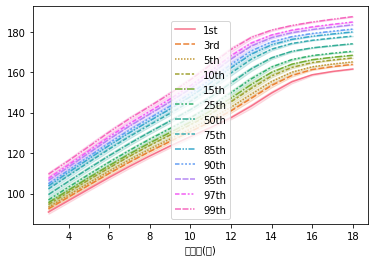

In [127]:
sns.lineplot(data=Test_male_year)

In [79]:
female_F

,성별,만나이(세),만나이(개월),L,M,S,1st,3rd,5th,10th,15th,25th,50th,75th,85th,90th,95th,97th,99th,-3SD,-2SD,-1SD,0,+1SD,+2SD,+3SD
228,2,0,0,1.0000,49.1477,0.0379,44.8,45.6,46.1,46.8,47.2,47.9,49.1,50.4,51.1,51.5,52.2,52.7,53.5,43.6,45.4,47.3,49.1,51.0,52.9,54.7
229,2,0,1,1.0000,53.6872,0.0364,49.1,50.0,50.5,51.2,51.7,52.4,53.7,55.0,55.7,56.2,56.9,57.4,58.2,47.8,49.8,51.7,53.7,55.6,57.6,59.5
230,2,0,2,1.0000,57.0673,0.0357,52.3,53.2,53.7,54.5,55.0,55.7,57.1,58.4,59.2,59.7,60.4,60.9,61.8,51.0,53.0,55.0,57.1,59.1,61.1,63.2
231,2,0,3,1.0000,59.8029,0.0352,54.9,55.8,56.3,57.1,57.6,58.4,59.8,61.2,62.0,62.5,63.3,63.8,64.7,53.5,55.6,57.7,59.8,61.9,64.0,66.1
232,2,0,4,1.0000,62.0899,0.0349,57.1,58.0,58.5,59.3,59.8,60.6,62.1,63.5,64.3,64.9,65.7,66.2,67.1,55.6,57.8,59.9,62.1,64.3,66.4,68.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2,18,223,-0.4881,160.8981,0.0308,149.9,152.0,153.0,154.7,155.9,157.6,160.9,164.3,166.2,167.4,169.4,170.6,173.1,147.0,151.4,156.1,160.9,166.0,171.3,176.9
452,2,18,224,-0.4959,160.9372,0.0308,150.0,152.0,153.1,154.8,155.9,157.6,160.9,164.3,166.2,167.5,169.4,170.7,173.1,147.0,151.5,156.1,160.9,166.0,171.3,176.9
453,2,18,225,-0.5037,160.9762,0.0307,150.1,152.1,153.1,154.8,156.0,157.7,161.0,164.4,166.2,167.5,169.4,170.7,173.1,147.1,151.5,156.1,161.0,166.0,171.4,176.9
454,2,18,226,-0.5116,161.0153,0.0307,150.1,152.1,153.2,154.9,156.0,157.7,161.0,164.4,166.3,167.5,169.5,170.7,173.2,147.2,151.6,156.2,161.0,166.1,171.4,176.9
